# Analyse du corpus A (Le Peuple 1890-1940)

Le corpus A correspond au fichier "txt1"

### Imports

In [1]:
import os
import textract

In [2]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/laure-
[nltk_data]     annemassart/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Vérifications diverses

In [4]:
txt1_path = '../data/txt1'

txts = []
for f in os.listdir(txt1_path):
    if os.path.isfile(os.path.join(txt1_path, f)):
        txts.append(f)
txts[:10]

['KB_JB837_1900-06-07_01-00004.txt',
 'KB_JB837_1899-07-11_01-00004.txt',
 'KB_JB837_1925-03-08_01-00001.txt',
 'KB_JB837_1898-11-25_01-00004.txt',
 'KB_JB837_1920-06-22_01-00003.txt',
 'KB_JB837_1902-02-28_01-00004.txt',
 'KB_JB837_1920-12-17_01-00002.txt',
 'KB_JB837_1898-08-30_01-00004.txt',
 'KB_JB837_1898-01-18_01-00004.txt',
 'KB_JB837_1899-07-17_01-00003.txt']

In [5]:
path = "../data/txt1/"
files = sorted(os.listdir(path))
len(files)

503

### Visualiser le nombre de documents par mois

In [6]:
all_years = [str(year) for year in range(1887, 1971)]

In [7]:
count_decade = defaultdict(int)
count_month = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
    else:
        print(f"Anomalous file: {f}")

count_decade

Anomalous file: .DS_Store
Anomalous file: 1939.txt


IndexError: list index out of range

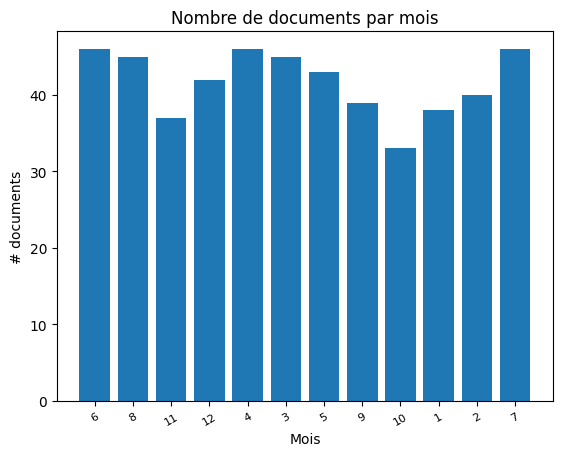

In [8]:
index = np.arange(len(count_month))
plt.bar(index, count_month.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, count_month.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.show()

### Fréquence des mots du corpus

In [9]:
!cat ../data/txt1/*.txt > ../data/txt1_all.txt

Paramétrage des stopwords

In [10]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "bruxelles", "rue", "pays", "centimes", 
       "sables", "vente", "heures", "grand", "leurs", "jour", "maison", "très", "ans", "quelques",
       "bon", "toute", "vient", "chez", "cent", "général", "Belgique", "belgique", "peu", "chambre"]
sw = set(sw)

In [ ]:
path = "../data/txt1_all.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]

In [ ]:
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

2792140 words found


In [ ]:
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

985105 words kept (171093 different word forms)


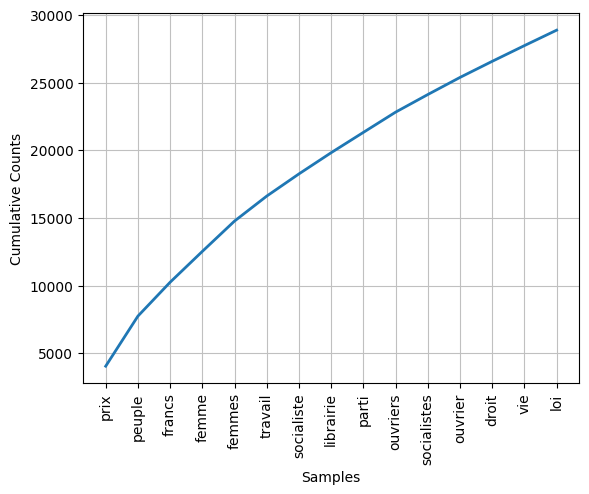

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Counts'>

In [ ]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

n = 15
fdist.plot(n, cumulative=True)

### Keywords

In [ ]:
import os
import yake

In [ ]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

Extraire les mots-clés

In [ ]:
keywords = kw_extractor.extract_keywords(text)
keywords

[('Bruxelles Bruxelles Bruxelles', 1.5387843346461706e-07),
 ('Bruxelles Prix francs', 3.2761906811330916e-07),
 ('Parti ouvrier belge', 4.06161323680971e-07),
 ('Sables BRUXELLES ABONNEMENTS', 6.162202175097227e-07),
 ('Librairie du Peuple', 6.974085321071588e-07),
 ('Sables BRUXELLES BELGIQUE', 7.962292799164576e-07),
 ('Anvers Bruxelles Bruxelles', 9.85445324933438e-07),
 ('Librairie socialiste', 1.0190143252569067e-06),
 ('Grand format Prix', 1.0249119184035519e-06),
 ('PEUPLE Société Coopérative', 1.1505419106461674e-06),
 ('Bruxelles', 1.1769260497477197e-06),
 ('Bruxelles Société Coopérative', 1.2291827771472596e-06),
 ('parti ouvrier', 1.2363520938688793e-06),
 ('Bruxelles Prix', 1.3428779816643425e-06),
 ('femmes socialistes', 1.525078494337308e-06),
 ('rue dea Sables', 1.5272488746818596e-06),
 ('PEUPLE Rue Joseph', 1.595513632776092e-06),
 ('Peuple', 1.7073186237439e-06),
 ('Société coopérative ouvrière', 1.762280108262354e-06),
 ('Sables Bruxelles', 2.4001651128886112e-06),

Extraire les bigrammes

In [ ]:
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['Librairie socialiste',
 'parti ouvrier',
 'Bruxelles Prix',
 'femmes socialistes',
 'Sables Bruxelles',
 'Société coopérative',
 'pages Prix',
 'Bonne brochure']

### Reconnaissance d'entités nommées

In [11]:
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

nlp = spacy.load('fr_core_news_md')

In [12]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"txt1_all.txt"
        output_path = f"txt1_clean.txt"
    else:
        input_path = f"{folder}/txt1_all.txt"
        output_path = f"{folder}/txt1_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [17]:
temp_path= '../data/'
n=100000
text = open(os.path.join(temp_path, f'txt1_all.txt'), encoding='utf-8').read()[:n]

In [18]:
%%time

doc = nlp(text)

CPU times: user 3.85 s, sys: 444 ms, total: 4.3 s
Wall time: 4.54 s


In [19]:
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [20]:
sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

M. Brialmont apparait 5 fois dans le corpus
M. Coremans apparait 5 fois dans le corpus
M. Woeste apparait 3 fois dans le corpus
Gladstone apparait 2 fois dans le corpus
Mérode apparait 2 fois dans le corpus
Emilie Claeys apparait 2 fois dans le corpus
Considérant apparait 2 fois dans le corpus
M. Bockstael apparait 2 fois dans le corpus
Van Naemen. apparait 2 fois dans le corpus
Woeste apparait 2 fois dans le corpus
Jules Mansart apparait 2 fois dans le corpus
Ponr apparait 2 fois dans le corpus
Sophie Bakounine apparait 2 fois dans le corpus
Alexander apparait 2 fois dans le corpus
Rnbezahl apparait 2 fois dans le corpus
dn comte d'Eu apparait 2 fois dans le corpus
Souvret apparait 2 fois dans le corpus
Mansart apparait 2 fois dans le corpus
Alfred Lombard apparait 2 fois dans le corpus
Delerue apparait 2 fois dans le corpus
Suzanne Fleichmann apparait 2 fois dans le corpus
Albertini apparait 2 fois dans le corpus
Mme V apparait 2 fois dans le corpus
P BUXELLE8 apparait 1 fois dans le

### Sentiment analysis

In [ ]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

In [ ]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

In [ ]:
get_sentiment("A l'usine ou à la fabrique, la femme peut rester douze ou quatorze heures par jour rivée à la chaîne d'un travail souvent homicide. Voyez dans les tissages et dans les fabriques de bougies, les femmes sont sujettes aux maux de tête, aux migraines et aux éblouissements. Chez elles, les attaques de nerfs sont fréquentes, la respiration est courte. Dans les mines, dans les fabriques d'allumettes, les femmes sont plus atteintes encore ; presque toutes avortent ou n'enfantent que des êtres rachitiques, de telle sorte qu'avant de les tuer elles-mêmes, l'industrie a le temps de leur tuer plusieurs enfants.")

This text is 9% positive and 0.125% subjective.


In [ ]:
get_sentiment("Nous sommes tous, dans le parti ouvrier, fort sympathiques au mouvement féministe, mais nous croyons qu'il doit trouver dans la classe populaire son foyer d'activité et de développement. Un grand nombre de dames à Bruxelles ont adhéré au mouvement féministe. Nous rendons hommage au bon mafcif qui les guide, mais qu'il nous soit permis de dire qu'elles font fausse route si elles se bornent à ne voir dans ce mouvement que le côté philanthropique.")

This text is 23% positive and 0.37% subjective.


### Word embeddings

In [ ]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

In [ ]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [ ]:
infile = f"../data/txt1_all.txt"
sentences = MySentences(infile)

In [ ]:
bigram_phrases = Phrases(sentences)
bigram_phraser = Phraser(phrases_model=bigram_phrases)

trigram_phrases = Phrases(bigram_phraser[sentences])
trigram_phraser = Phraser(phrases_model=trigram_phrases)

In [ ]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [ ]:
%%time
model = Word2Vec(
    corpus, 
    vector_size=32, 
    window=1500,
    min_count=1,
    workers=50, 
    epochs=5 
)

CPU times: user 5.8 s, sys: 298 ms, total: 6.1 s
Wall time: 6.32 s


In [ ]:
outfile = f"../data/txt1.model"
model.save(outfile)

model = Word2Vec.load("../data/txt1.model")

In [ ]:
model.wv.similarity("femme", "mere")

0.9925127

In [ ]:
model.wv.most_similar("femme", topn=50)

[('service', 0.997208833694458),
 ('etat', 0.9971792101860046),
 ('ce_jour', 0.9969854354858398),
 ('dans_toutes', 0.9969186186790466),
 ('seront', 0.996851921081543),
 ('industries', 0.9968482255935669),
 ('occasion', 0.9968013167381287),
 ('ponr', 0.9967895150184631),
 ('fr_.;', 0.9967798590660095),
 ('celle', 0.9967689514160156),
 ('apres', 0.996740460395813),
 ('instruments', 0.9967303276062012),
 ('ce_sont', 0.996685266494751),
 ('poste', 0.9966773986816406),
 ('.)', 0.9966408610343933),
 ('eglise', 0.9966206550598145),
 ('nouveaux', 0.9966091513633728),
 ('la_question', 0.9966041445732117),
 ('es', 0.9966026544570923),
 ('jour', 0.9966013431549072),
 ('achete', 0.996597409248352),
 ('da', 0.9965952038764954),
 ('q', 0.9965909719467163),
 ('dont', 0.9965856075286865),
 ('le_nombre', 0.9965747594833374),
 ('travailleurs', 0.9965739846229553),
 ('lutte_entre', 0.9965580701828003),
 ('re', 0.9965578317642212),
 ('se_sont', 0.9965486526489258),
 ('action_politique', 0.996536910533905)